# Data Cleaning Notebook 
## * Note to self make better toy dataset for graph visuals

This is a starter notebook to maintain a simple code repository on how to handle missing values in a dataset. In the future, I plan to make a better set of functions in actual python values but for now this is a simple jupyter notebook using the titanic dataset from kaggle as an example. 

In [19]:
# importing pandas as pd 
import pandas as pd 
  
# importing numpy as np 
import numpy as np 
  
# dictionary of lists 
dict = {'col1':[100, 165, np.nan, 12], 
        'col2': [30, np.nan, 45, 56], 
        'col3':[52, 40, 80, 98], 
        'col4':[np.nan, np.nan, np.nan, 65]} 
  
# creating a dataframe from dictionary 
df = pd.DataFrame(dict) 
    
df 

,col1,col2,col3,col4
0,100.0,30.0,52,NaN
1,165.0,NaN,40,NaN
2,NaN,45.0,80,NaN
3,12.0,56.0,98,65.0


## 1. Missing Values

### Drop Values Completely


In [15]:
# Drop Specific Column Values
df.drop(['col1', 'col2'], axis=1, inplace=True)

# Drop any column that has at least one NA 
# using dropna() function      
df.dropna(axis = 1) 

,col3
0,52
1,40
2,80
3,98


In [18]:
# Drop Row Values

# Drop any row that contains a NA 
# using dropna() function   
df.dropna() 

# Drop a row only is all of its values are N/A
# using dropna() function     
df.dropna(how = 'all') 

# Drop rows with any N/A in specific columns only 
# using dropna() function
df.dropna(how='any', subset=['col1', 'col2'])

,col1,col2,col3,col4
0,100.0,30.0,52,NaN
3,12.0,56.0,98,65.0


### Impute Missing Values

In [20]:
## Numeric Replacement use fillna()
# Fill all columns with the mean from that specific column 
df = df.fillna(df.mean())

# Fill specific column NaN's with specific values
values = {'col1': 0, 'col2': 1, 'col3': 2, 'col4': 3}
df.fillna(value=values)


## Impute linear interpolation at missing values (doesnt make sense for this example but for time series)
df.col1.interpolate()

#check out different METHODS .interpolate(method = "METHODS") for the best one 

0    100.000000
1    165.000000
2     92.333333
3     12.000000
Name: col1, dtype: float64

### Masking Missing Values

In [21]:
# For a specific column 

df['col1'].fillna('missing')

0    100.000000
1    165.000000
2     92.333333
3     12.000000
Name: col1, dtype: float64

## Detecting Outliers

Outliers are observations that are distinctly different from the rest of the data. These values are incredibly important because they could be considered noise in the model and removed, or they could represent a small but important trend or piece of information in your model. 

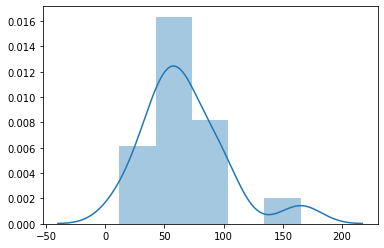

In [27]:
# Histogram and density plot 

import seaborn as sns

sns.distplot(df, bins = 5)

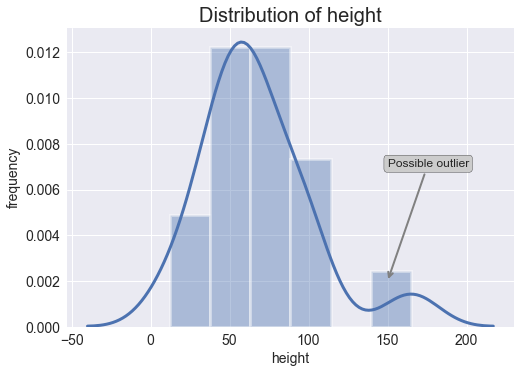

In [39]:
# histogram and kernel density estimation function of the variable height
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

ax = sns.distplot(df, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

# notation indicating a possible outlier
ax.annotate('Possible outlier', xy=(150,0.0020), xytext=(150,0.00700), fontsize=12,
            arrowprops=({'arrowstyle':'->', 'ec':'grey', 'lw':2}), bbox = ({'boxstyle':"round", 'fc':"0.8"}))

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('height', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution of height', fontsize=20);

Text(0.5, 1.0, 'Distribution of height')

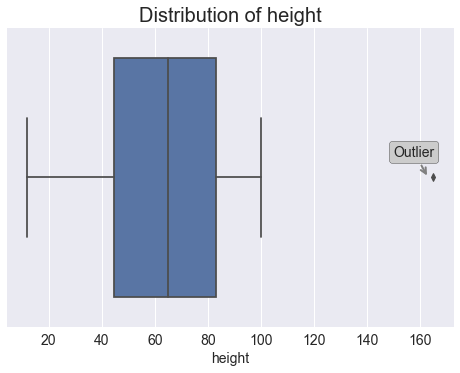

In [45]:
# Box plot 
# box plot of the variable height
ax = sns.boxplot(df)

# notation indicating an outlier
ax.annotate('Outlier', xy=(163,0), xytext=(150,-0.07), fontsize=14,
            arrowprops=({'arrowstyle':'->', 'ec':'grey', 'lw':2}), bbox = ({'boxstyle':"round", 'fc':"0.8"}))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('height', fontsize=14)
plt.title('Distribution of height', fontsize=20)

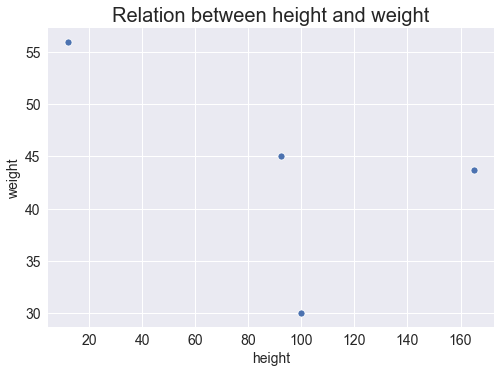

In [49]:
# scatter plot
ax = sns.scatterplot(x='col1', y='col2', data=df, s=50)

# notations indicating an outlier
#ax.annotate('Outlier', xy=(190,105), xytext=(183,102), fontsize=14,
           # arrowprops=({'arrowstyle':'->', 'ec':'grey', 'lw':2}), bbox = ({'boxstyle':"round", 'fc':"0.8"}))
#ax.annotate('Outlier', xy=(165,85), xytext=(158,82), fontsize=14,
            #arrowprops=({'arrowstyle':'->', 'ec':'grey', 'lw':2}), bbox = ({'boxstyle':"round", 'fc':"0.8"}))

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('height', fontsize=14)
plt.ylabel('weight', fontsize=14)
plt.title('Relation between height and weight', fontsize=20);

In [13]:
# Statistically Interquartile Range
import numpy as np 

# Calculate Interquartile range
q25, q50, q75 = np.percentile(df, [25,50,75])
iqr = q75 - q25

# Calculate the min/max limits to be considered as outliers
min_v = q25 - 1.5*(iqr)
max_v = q75 + 1.5*(iqr)

print(min_v, q25, q50, q75, max_v)

#identify the points 
[x for x in df['col1'] if x > max_v]

-11.25 50.25 65.0 91.25 152.75


[]

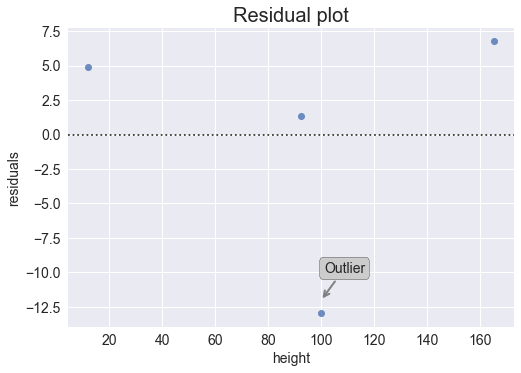

In [52]:
# Residuals
# difference between actual and predicted values of outcome variable - represent model failure

# residual plot with seaborn library
sns.residplot(x='col1', y='col2', data=df, scatter_kws=({'s':50}))

# annotations indicating an outlier
plt.annotate('Outlier', xy=(100,-12), xytext=(101,-10), fontsize=14,
            arrowprops=({'arrowstyle':'->', 'ec':'grey', 'lw':2}), bbox = ({'boxstyle':"round", 'fc':"0.8"}))

#plt.annotate('Outlier', xy=(190,6), xytext=(183,4), fontsize=14,
            #arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('height', fontsize=14)
plt.ylabel('residuals', fontsize=14)
plt.title('Residual plot', fontsize=20);

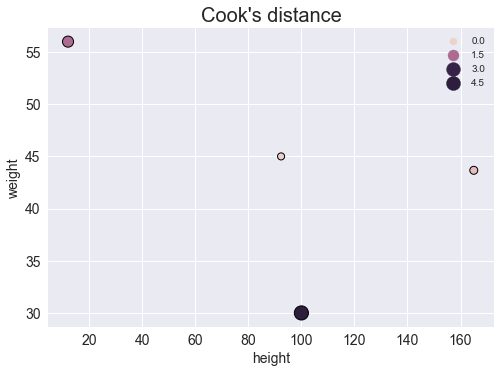

In [54]:
## Cooks Distance 

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence

# fit the regression model using statsmodels library 
f = 'col1 ~ col2'
model = ols(formula=f, data=df).fit()

# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance

# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
sns.scatterplot(df.col1, df.col2, hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('height', fontsize=14)
plt.ylabel('weight', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


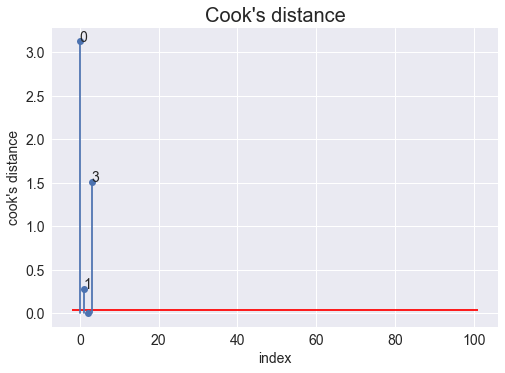

In [55]:
# Set a threshold value and find data with cooks distance higher than that value 

threshold = 4/100

# stem plot - the x-axis represents the index of the observation and the y-axis its Cook's distance
plt.stem(distance, basefmt=" ")

# horizontal line showing the threshold value
plt.hlines(threshold, -2, 101, 'r')

# the observations with Cook's distances higher than the threshold value are labeled in the plot
influencial_data = distance[distance > threshold]

for index, value in influencial_data.items():
    plt.text(index, value, str(index), fontsize=14)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('index', fontsize=14)
plt.ylabel('cook\'s distance', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);